In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as sps
import warnings
from sklearn.datasets import fetch_california_housing

%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 7.0)
warnings.filterwarnings("ignore")

In [13]:
california = fetch_california_housing()

In [15]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [16]:
df = pd.DataFrame(california.data, columns=california.feature_names)

In [17]:
df["price"] = california.target

In [21]:
df.columns = map(str.lower, df.columns)
df.head()

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   medinc      20640 non-null  float64
 1   houseage    20640 non-null  float64
 2   averooms    20640 non-null  float64
 3   avebedrms   20640 non-null  float64
 4   population  20640 non-null  float64
 5   aveoccup    20640 non-null  float64
 6   latitude    20640 non-null  float64
 7   longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [23]:
research_list = list(df.columns)
research_list

['medinc',
 'houseage',
 'averooms',
 'avebedrms',
 'population',
 'aveoccup',
 'latitude',
 'longitude',
 'price']

In [26]:
df[["medinc", "price"]].head() # Обрезка df

,medinc,price
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422


In [27]:
corr_m = df[research_list].corr()

In [28]:
corr_m

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,price
medinc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
houseage,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
averooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
avebedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
aveoccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

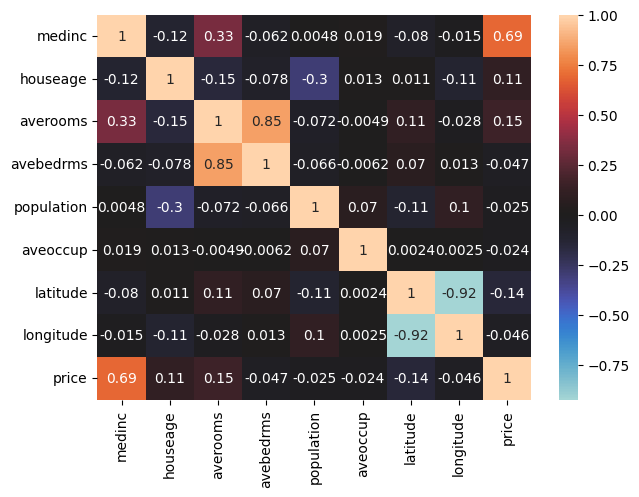

In [29]:
plt.figure(figsize=(7,5))
sns.heatmap(corr_m, center=0, annot=True)

Коэффициент корреляции 0.6880752079585475


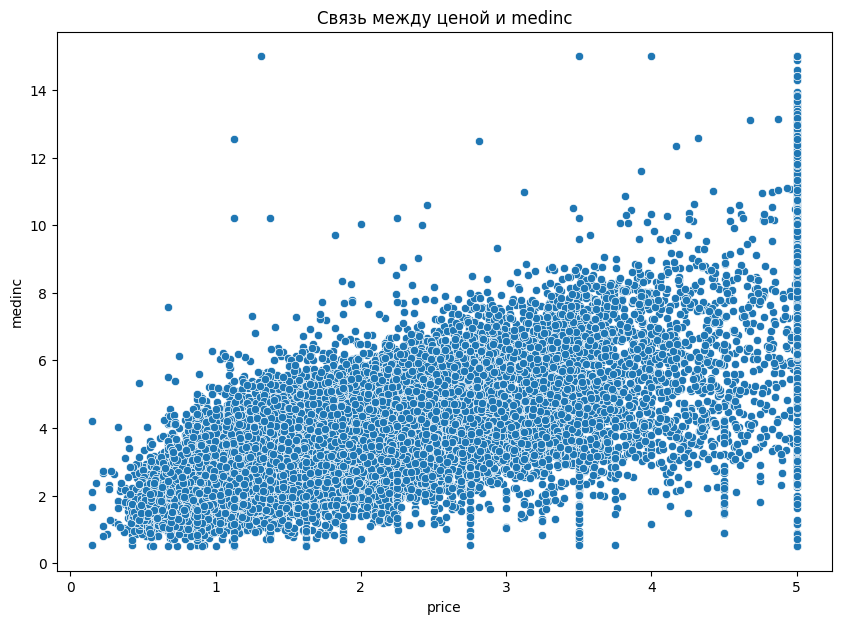

In [31]:
level = 0.3
for i in research_list[:-1]:
    curr_corr = df[i].corr(df.price)
    if abs(curr_corr) >= level:
        sns.scatterplot(x="price", y=i, data=df)
        print("Коэффициент корреляции " + str(curr_corr))
        plt.title("Связь между ценой и "+str(i))
        plt.show()